### Import Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Import Data

In [12]:
df = pd.read_csv("C:\Data Science\Project\gym members data.csv")
print(df)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0       

### Basic Informations

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Data Cleaning 

### Check Duplicates

In [14]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
968    False
969    False
970    False
971    False
972    False
Length: 973, dtype: bool


### Boxplot

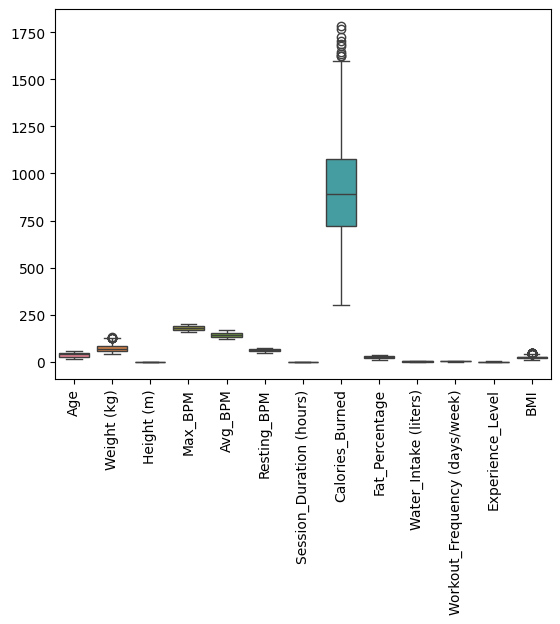

In [15]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

### Encoding

In [17]:
categ_col = df.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = df.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(df[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0      

### Extract dependent and independent variables

In [19]:
X = encoded_data.iloc[:,0:10]   #Independent variable
y = encoded_data['Calories_Burned']     #dependent variable

### Statistical Analysis

### (Correlation,Describe)

In [20]:
print(df.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

                                    Age    Gender  Weight (kg)  Height (m)  \
Age                            1.000000  0.027175    -0.036340   -0.027837   
Gender                         0.027175  1.000000     0.579340    0.583503   
Weight (kg)                   -0.036340  0.579340     1.000000    0.365321   
Height (m)                    -0.027837  0.583503     0.365321    1.000000   
Max_BPM                       -0.017073  0.010245     0.057061   -0.017660   
Avg_BPM                        0.035969  0.009648     0.009717   -0.014776   
Resting_BPM                    0.004354  0.014062    -0.032138   -0.005090   
Session_Duration (hours)      -0.019912 -0.012200    -0.013666   -0.010206   
Calories_Burned               -0.154679  0.150646     0.095443    0.086348   
Workout_Type                   0.044296  0.035473    -0.028724    0.037712   
Fat_Percentage                 0.002370 -0.407309    -0.225512   -0.235521   
Water_Intake (liters)          0.041528  0.667658     0.394276  

<Axes: >

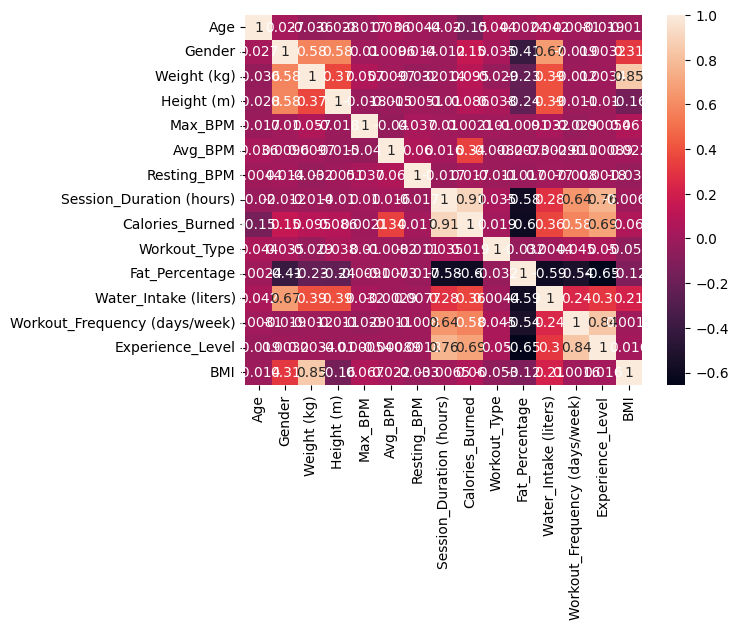

In [21]:
correlation=encoded_data.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)

### Split Train and Test Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Model

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

#pedicition the test set result
y_pred = model.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'predicted' : y_pred})
print(data)

     Actual  predicted
199   929.0      929.0
538  1401.0     1401.0
174   925.0      925.0
464  1155.0     1155.0
66   1587.0     1587.0
..      ...        ...
578   848.0      848.0
327   944.0      944.0
878   706.0      706.0
849   552.0      552.0
801  1491.0     1491.0

[195 rows x 2 columns]


In [24]:
score = r2_score(y_test,y_pred)
print("r2 score is ",score*100,"%")

r2 score is  100.0 %
